In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from math import sin,cos,pi

In [ ]:
def bilinear_interpolation(image, x, y, theta):
    #x,y= int(np.ceil((x)*xScale))-1,int(np.ceil((y) * yScale))-1

    theta_rad = theta * (pi/180)

    #new_origin
    x0 = image.shape[0] / 2
    y0 = image.shape[1] / 2

    x,y = x-x0, y-y0
    #rotate by (-theta)
    x,y = x*cos(theta_rad)+y*sin(theta_rad),  x*-sin(theta_rad)+ y*cos(theta_rad)

    #spatial origin
    x,y = x+x0, y+y0



    x1 = int(np.floor(x))
    y1 = int(np.floor(y))
    x2 = int(np.ceil(x))
    y2 = int(np.ceil(y))


    if x1 < 0 or x1 >= image.shape[0]  or x2 < 0 or x2 >= image.shape[0] or y1 < 0  or y1 >= image.shape[1] or y2 < 0  or y2 >= image.shape[1]:
        return [0,0,0]

    a = image[x1,y1]
    b = image[x1,y2]
    c = image[x2,y1]
    d = image[x2,y2]

    dx = x - x1
    dy = y - y1

    new_pixel = a * (1 - dx) * (1 - dy)
    new_pixel= np.add(new_pixel,b * dy * (1 - dx))
    new_pixel= np.add(new_pixel,c * dx * (1 - dy))
    new_pixel= np.add(new_pixel, d * dx * dy)

    return new_pixel

In [ ]:
def rotate(m, theta):
    w, h = m.shape[:2];

    newImage = np.zeros([w, h, 3]);

    for i in range(w):
      for j in range(h):
        newImage[i , j ]= bilinear_interpolation(m,i,j, theta)

    return newImage


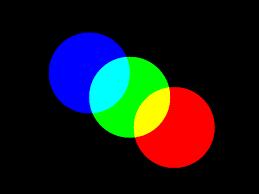

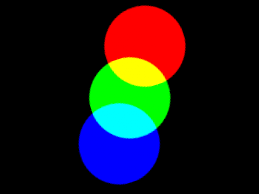

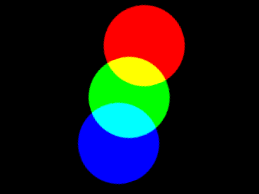

In [ ]:
img = cv2.imread('/content/drive/MyDrive/DIP/download.png',1)
cv2_imshow(img)
print()
cv2_imshow(rotate(img, 108))

print()

import imutils
print()
cv2_imshow(imutils.rotate(img,angle=108))

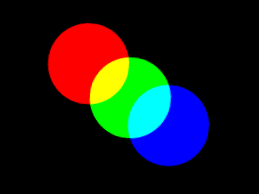

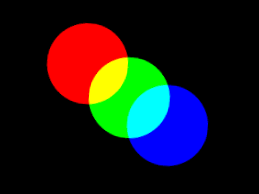

In [ ]:
cv2_imshow(rotate(img, 175))

print()

import imutils
print()
cv2_imshow(imutils.rotate(img,angle=175))